In [1]:
import sys
from qiskit.converters import circuit_to_dag, dag_to_circuit
import supremacy_generator as suprem_gen
import auto_cut_finder as cut_finder
import old_cutter as old_cutter
import cutter as new_cutter
from qiskit.tools.visualization import dag_drawer
import networkx as nx
import copy
from qiskit.circuit.quantumregister import QuantumRegister

bug_circ = None
bug_cuts = None

while(1):
    circ = suprem_gen.circuit_generator(circuit_dimension=(4,4,8), random_order=True)
    pareto_K_d = cut_finder.find_pareto_solutions(circ, num_clusters=2)
    bug_circ = None
    bug_cuts = None
    for pareto_key in pareto_K_d:
        pareto_K, pareto_d = pareto_key
        pareto_cuts, pareto_grouping = pareto_K_d[pareto_key]
        fragments, complete_path_map, K, d = new_cutter.cut_circuit(circ, pareto_cuts)
        if pareto_K != K or pareto_d != d:
            bug_circ = circ
            bug_cuts = pareto_K_d[pareto_key]
            print('%d groups:'%len(pareto_grouping))
            [print(x) for x in pareto_grouping]
            raise Exception('pareto predicted wrong, pareto_key = {}, cutter returns: {}'.format(pareto_key, (K,d)))

will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877 times
will run 877

KeyboardInterrupt: 

In [2]:
d = cut_finder.cluster_character(pareto_grouping)
print(d)

{'q[0]': [0, 1], 'q[4]': [0, 1, 2], 'q[1]': [1, 0], 'q[12]': [1, 0], 'q[13]': [1, 2, 0], 'q[14]': [2], 'q[8]': [0, 1, 2], 'q[5]': [2, 1, 0], 'q[9]': [1, 2, 0]}
{'q[10]': [1, 3, 2, 0], 'q[14]': [0, 1], 'q[15]': [1, 0], 'q[11]': [2, 0, 1], 'q[7]': [1, 2, 0], 'q[9]': [3], 'q[5]': [3], 'q[6]': [3, 1, 2, 0], 'q[2]': [0, 1, 2], 'q[1]': [2], 'q[3]': [1, 0]}
20


path_map:
(QuantumRegister(16, 'q'), 0) [(QuantumRegister(16, 'q'), 0)]
(QuantumRegister(16, 'q'), 1) [(QuantumRegister(16, 'q'), 1)]
(QuantumRegister(16, 'q'), 2) [(QuantumRegister(16, 'q'), 2)]
(QuantumRegister(16, 'q'), 3) [(QuantumRegister(16, 'q'), 3)]
(QuantumRegister(16, 'q'), 4) [(QuantumRegister(16, 'q'), 4), (QuantumRegister(5, 'cutQ'), 0)]
(QuantumRegister(16, 'q'), 5) [(QuantumRegister(16, 'q'), 5), (QuantumRegister(5, 'cutQ'), 4), (QuantumRegister(5, 'cutQ'), 3)]
(QuantumRegister(16, 'q'), 6) [(QuantumRegister(16, 'q'), 6)]
(QuantumRegister(16, 'q'), 7) [(QuantumRegister(16, 'q'), 7)]
(QuantumRegister(16, 'q'), 8) [(QuantumRegister(16, 'q'), 8)]
(QuantumRegister(16, 'q'), 9) [(QuantumRegister(16, 'q'), 9)]
(QuantumRegister(16, 'q'), 10) [(QuantumRegister(16, 'q'), 10), (QuantumRegister(5, 'cutQ'), 1)]
(QuantumRegister(16, 'q'), 11) [(QuantumRegister(16, 'q'), 11), (QuantumRegister(5, 'cutQ'), 2)]
(QuantumRegister(16, 'q'), 12) [(QuantumRegister(16, 'q'), 12)]
(QuantumRegis

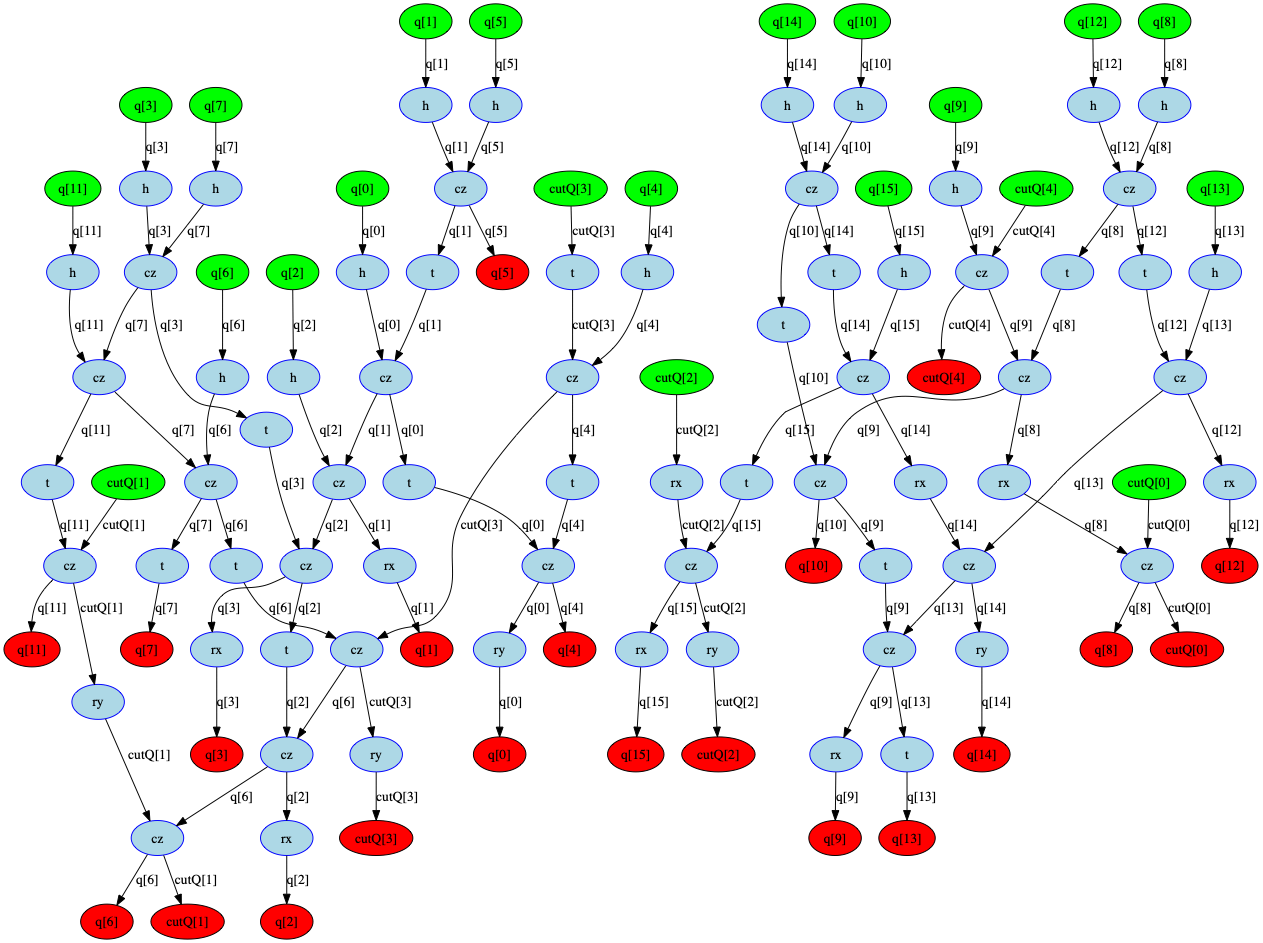

In [2]:
original_dag = circuit_to_dag(bug_circ)
positions = bug_cuts
cut_dag, path_map = new_cutter.cut_edges(original_dag=original_dag, positions=positions)
print('path_map:')
[print(x,path_map[x]) for x in path_map]
print('*'*100)

fragments, fragment_qubits = new_cutter.fragments_generator(cut_dag, path_map)
complete_path_map = new_cutter.complete_path_map_generator(path_map, fragment_qubits)
[print('fragment %d qubits:\n' %idx, x, '\n','*'*100) for idx, x in enumerate(fragment_qubits)]

print('complete_path_map:')
[print(x,complete_path_map[x]) for x in complete_path_map]
print('*'*100)

dag_to_circuit(cut_dag).draw(line_length=400)
dag_drawer(cut_dag)

[((QuantumRegister(16, 'q'), 5), 4), ((QuantumRegister(16, 'q'), 10), 4), ((QuantumRegister(16, 'q'), 4), 3), ((QuantumRegister(16, 'q'), 11), 3), ((QuantumRegister(16, 'q'), 10), 2)]


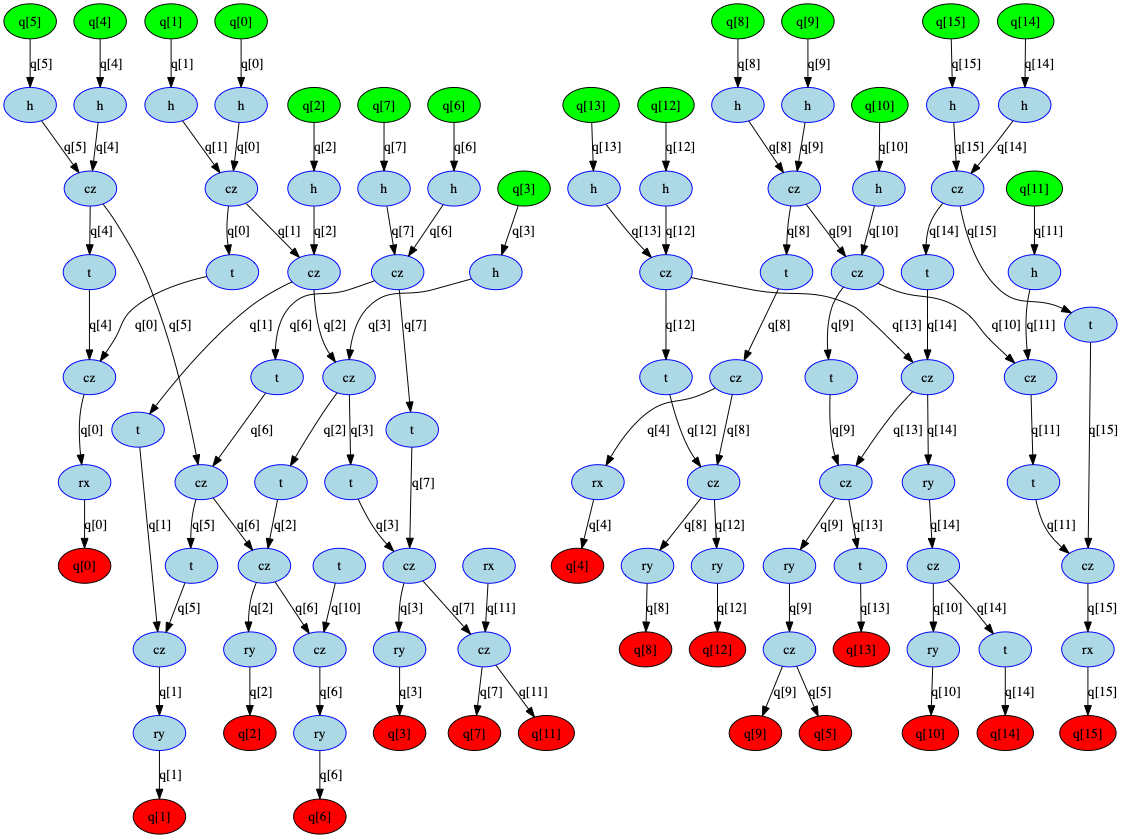

In [3]:
original_dag = circuit_to_dag(bug_circ)
positions = bug_cuts
print(positions)
cut_dag, _ = old_cutter.cut_edges(original_dag=original_dag, positions=positions)
dag_drawer(cut_dag)

In [10]:
l = [3,4,7,8]
rolling_idx = l[0]
d = 1
for idx, ele in enumerate(l):
    print(rolling_idx, idx, ele)
    if ele == rolling_idx:
        rolling_idx += 1
    else:
        print('crevice found')
        d += 1
        rolling_idx = ele + 1
print(d)

3 0 3
4 1 4
5 2 7
crevice found
8 3 8
2
